# 감성분석과 로지스틱 회귀분석

1. 사전기반 
- 단어별로 긍/부정을 나누어 감성사전을 생성
- 문장에서 긍/부정의 단어수를 세서 많은쪽으로 생성

2. 기계학습
- 사전보다 성능우수, 배경지식 불필요, 어순고려가능, 감성사전 자동생성 가능
- 학습용 데이터가 많이 필요함, 
   그 데이터에 긍/부정으로 레이블을 붙이는데 노력이 많이 필요함, 
   통계나 기계학습 지식이 필요함

- 선형 모형 : y = wx + b
x : 문서내 특정 단어의 빈도
y : 문서의 긍/부정(긍정1 부정0)
w : 가중치 or 계수
b : 편향 (bias)

* 로지스틱 회귀 함수 = 시그모이드 함수

- 출력값에 대한 해석
0~1사이 실수 출력
ex> 0.8이면 긍정일 확률이 80% (부정일 확률이 20%)
보통 0.5를 기준으로 높으면 긍정, 낮으면 부정으로 예측함

- 경사하강법 알고리즘을 사용 (gradient descent) 
  : 모형의 예측 문장의 실제 긍/부정의 차이를 손실함수로 측정, 그 함수값을      가장 작게 만드는 파라미터를 찾음

In [ ]:
!pip install kiwipiepy

In [ ]:
import wget
wget.download('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')

  4% [...                                                                     ]   688128 / 14628807100% [........................................................................] 14628807 / 14628807

'ratings_train.txt'

# <전처리>

## 1. 데이터 확인

In [ ]:
import pandas as pd

nsmc = pd.read_csv('ratings_train.txt', sep= '\t')
nsmc

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


# 2. 형태소 분석

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.prepare()

In [ ]:
text = nsmc.document[0]
text

'아 더빙.. 진짜 짜증나네요 목소리'

In [ ]:
#형태소 분석 함수 사용 ( kiwi.analyze())
result = kiwi.analyze(text)
result

[([Token(form='아', tag='IC', start=0, len=1),
   Token(form='더빙', tag='NNG', start=2, len=2),
   Token(form='..', tag='SF', start=4, len=2),
   Token(form='진짜', tag='MAG', start=7, len=2),
   Token(form='짜증', tag='NNG', start=10, len=2),
   Token(form='나', tag='VV', start=12, len=1),
   Token(form='네요', tag='EF', start=13, len=2),
   Token(form='목소리', tag='NNG', start=16, len=3)],
  -70.44538879394531)]

In [ ]:
result1 = kiwi.analyze(nsmc.document)
result1

In [ ]:
a = 0

try : 
    for idx, x in enumerate(result):
        print(x)
        a = idx
    print(a)
except:
    pass

([Token(form='아', tag='IC', start=0, len=1), Token(form='더빙', tag='NNG', start=2, len=2), Token(form='..', tag='SF', start=4, len=2), Token(form='진짜', tag='MAG', start=7, len=2), Token(form='짜증', tag='NNG', start=10, len=2), Token(form='나', tag='VV', start=12, len=1), Token(form='네요', tag='EF', start=13, len=2), Token(form='목소리', tag='NNG', start=16, len=3)], -70.44538879394531)
0


In [ ]:
result[0][0]

[Token(form='아', tag='IC', start=0, len=1),
 Token(form='더빙', tag='NNG', start=2, len=2),
 Token(form='..', tag='SF', start=4, len=2),
 Token(form='진짜', tag='MAG', start=7, len=2),
 Token(form='짜증', tag='NNG', start=10, len=2),
 Token(form='나', tag='VV', start=12, len=1),
 Token(form='네요', tag='EF', start=13, len=2),
 Token(form='목소리', tag='NNG', start=16, len=3)]

In [ ]:
for token, pos, start, end in result[0][0]:
    if pos[0] in 'NV':
        print(token)

더빙
짜증
나
목소리


In [ ]:
for token, pos, start, end in result[0][0]:
    if pos in ['NNG','VV', 'VA']:
        print(token)

더빙
짜증
나
목소리


In [ ]:
for token, pos, start, end in result[0][0]:
    if pos[0] in 'NV':
        print(token, pos)

더빙 NNG
짜증 NNG
나 VV
목소리 NNG


In [ ]:
for token, pos, start, end in result[0][0]:
    if pos[0] in 'NV':
        print(f'{token}/{pos}')

더빙/NNG
짜증/NNG
나/VV
목소리/NNG


In [ ]:
result[0][0]

[Token(form='아', tag='IC', start=0, len=1),
 Token(form='더빙', tag='NNG', start=2, len=2),
 Token(form='..', tag='SF', start=4, len=2),
 Token(form='진짜', tag='MAG', start=7, len=2),
 Token(form='짜증', tag='NNG', start=10, len=2),
 Token(form='나', tag='VV', start=12, len=1),
 Token(form='네요', tag='EF', start=13, len=2),
 Token(form='목소리', tag='NNG', start=16, len=3)]

In [ ]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}/{pos}' #return 값을 단일갯수씩 받으며 처리 (메모리값 낭비가 적음)

In [ ]:
list(extract_keywords(nsmc.document[1]))

['포스터/NNG',
 '보/VV',
 '초딩/NNP',
 '영화/NNG',
 '줄/NNG',
 '오버/NNG',
 '연기/NNG',
 '가볍/VA-I',
 '않/VX']

## 3. 문서 단어 행렬

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_keywords)

In [ ]:
nsmc.shape

(150000, 3)

In [ ]:
nsmc

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
dtm = cv.fit_transform(nsmc.loc[0:1999, 'document'])

In [ ]:
trans = TfidfTransformer()
dtm2 = trans.fit_transform(dtm)

In [ ]:
dtm.shape

(2000, 1000)

In [ ]:
words = cv.get_feature_names()
words

c:\Users\pc1\anaconda3\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['13구역/NNP',
 '가/VV',
 '가/VX',
 '가능/NNG',
 '가볍/VA-I',
 '가슴/NNG',
 '가족/NNG',
 '가지/NNB',
 '가지/VV',
 '가치/NNG',
 '각본/NNG',
 '간/NNB',
 '갈등/NNG',
 '감독/NNG',
 '감동/NNG',
 '감사/NNG',
 '감성/NNG',
 '감정/NNG',
 '강요/NNG',
 '강하/VA',
 '갖추/VV',
 '같/VA',
 '개/NNB',
 '개/NNG',
 '개그/NNG',
 '개그맨/NNG',
 '개념/NNG',
 '개봉/NNG',
 '개뿔/NNG',
 '개연/NNG',
 '개인/NNG',
 '개판/NNG',
 '거/NNB',
 '거기/NP',
 '거리/NNG',
 '거리/VV',
 '거부/NNG',
 '거슬리/VV',
 '거장/NNG',
 '걱정/NNG',
 '걸/VV',
 '걸리/VV',
 '걸작/NNG',
 '검술/NNG',
 '것/NNB',
 '게이/NNG',
 '게임/NNG',
 '결국/NNG',
 '결말/NNG',
 '고추/NNG',
 '곳/NNG',
 '곳곳/NNG',
 '공감/NNG',
 '공감/NNP',
 '공부/NNG',
 '공포/NNG',
 '공포물/NNG',
 '곽지민/NNP',
 '관객/NNG',
 '관계/NNG',
 '관람/NNG',
 '관심/NNG',
 '괜찮/VA',
 '교훈/NNG',
 '구경/NNG',
 '구리/VA',
 '구성/NNG',
 '구하/VV',
 '국민/NNG',
 '국산/NNG',
 '군/NNG',
 '군대/NNG',
 '굿/NNG',
 '굿/NNP',
 '귀신/NNG',
 '귀엽/VA-I',
 '그/NP',
 '그거/NP',
 '그것/NP',
 '그녀/NP',
 '그때/NNG',
 '그래픽/NNG',
 '그러/VV',
 '그렇/VA',
 '그리/VV',
 '그림/NNG',
 '그립/VA-I',
 '극/NNG',
 '극장/NNG',
 '극장판/NNG',
 '글/NNG',
 '급/NNG',
 '기/NNG',
 '기대/

# 4. 저장

In [ ]:
import joblib
joblib.dump({'words': words, 'dtm': dtm}, 'nsmc.pkl')

['nsmc.pkl']

## 5. train_test_split

In [ ]:
import joblib

data = joblib.load('nsmc.pkl')

In [ ]:
data['words']

['13구역/NNP',
 '가/VV',
 '가/VX',
 '가능/NNG',
 '가볍/VA-I',
 '가슴/NNG',
 '가족/NNG',
 '가지/NNB',
 '가지/VV',
 '가치/NNG',
 '각본/NNG',
 '간/NNB',
 '갈등/NNG',
 '감독/NNG',
 '감동/NNG',
 '감사/NNG',
 '감성/NNG',
 '감정/NNG',
 '강요/NNG',
 '강하/VA',
 '갖추/VV',
 '같/VA',
 '개/NNB',
 '개/NNG',
 '개그/NNG',
 '개그맨/NNG',
 '개념/NNG',
 '개봉/NNG',
 '개뿔/NNG',
 '개연/NNG',
 '개인/NNG',
 '개판/NNG',
 '거/NNB',
 '거기/NP',
 '거리/NNG',
 '거리/VV',
 '거부/NNG',
 '거슬리/VV',
 '거장/NNG',
 '걱정/NNG',
 '걸/VV',
 '걸리/VV',
 '걸작/NNG',
 '검술/NNG',
 '것/NNB',
 '게이/NNG',
 '게임/NNG',
 '결국/NNG',
 '결말/NNG',
 '고추/NNG',
 '곳/NNG',
 '곳곳/NNG',
 '공감/NNG',
 '공감/NNP',
 '공부/NNG',
 '공포/NNG',
 '공포물/NNG',
 '곽지민/NNP',
 '관객/NNG',
 '관계/NNG',
 '관람/NNG',
 '관심/NNG',
 '괜찮/VA',
 '교훈/NNG',
 '구경/NNG',
 '구리/VA',
 '구성/NNG',
 '구하/VV',
 '국민/NNG',
 '국산/NNG',
 '군/NNG',
 '군대/NNG',
 '굿/NNG',
 '굿/NNP',
 '귀신/NNG',
 '귀엽/VA-I',
 '그/NP',
 '그거/NP',
 '그것/NP',
 '그녀/NP',
 '그때/NNG',
 '그래픽/NNG',
 '그러/VV',
 '그렇/VA',
 '그리/VV',
 '그림/NNG',
 '그립/VA-I',
 '극/NNG',
 '극장/NNG',
 '극장판/NNG',
 '글/NNG',
 '급/NNG',
 '기/NNG',
 '기대/

In [ ]:
#reset words
words = ''

In [ ]:
locals().update(data)

In [ ]:
words

['13구역/NNP',
 '가/VV',
 '가/VX',
 '가능/NNG',
 '가볍/VA-I',
 '가슴/NNG',
 '가족/NNG',
 '가지/NNB',
 '가지/VV',
 '가치/NNG',
 '각본/NNG',
 '간/NNB',
 '갈등/NNG',
 '감독/NNG',
 '감동/NNG',
 '감사/NNG',
 '감성/NNG',
 '감정/NNG',
 '강요/NNG',
 '강하/VA',
 '갖추/VV',
 '같/VA',
 '개/NNB',
 '개/NNG',
 '개그/NNG',
 '개그맨/NNG',
 '개념/NNG',
 '개봉/NNG',
 '개뿔/NNG',
 '개연/NNG',
 '개인/NNG',
 '개판/NNG',
 '거/NNB',
 '거기/NP',
 '거리/NNG',
 '거리/VV',
 '거부/NNG',
 '거슬리/VV',
 '거장/NNG',
 '걱정/NNG',
 '걸/VV',
 '걸리/VV',
 '걸작/NNG',
 '검술/NNG',
 '것/NNB',
 '게이/NNG',
 '게임/NNG',
 '결국/NNG',
 '결말/NNG',
 '고추/NNG',
 '곳/NNG',
 '곳곳/NNG',
 '공감/NNG',
 '공감/NNP',
 '공부/NNG',
 '공포/NNG',
 '공포물/NNG',
 '곽지민/NNP',
 '관객/NNG',
 '관계/NNG',
 '관람/NNG',
 '관심/NNG',
 '괜찮/VA',
 '교훈/NNG',
 '구경/NNG',
 '구리/VA',
 '구성/NNG',
 '구하/VV',
 '국민/NNG',
 '국산/NNG',
 '군/NNG',
 '군대/NNG',
 '굿/NNG',
 '굿/NNP',
 '귀신/NNG',
 '귀엽/VA-I',
 '그/NP',
 '그거/NP',
 '그것/NP',
 '그녀/NP',
 '그때/NNG',
 '그래픽/NNG',
 '그러/VV',
 '그렇/VA',
 '그리/VV',
 '그림/NNG',
 '그립/VA-I',
 '극/NNG',
 '극장/NNG',
 '극장판/NNG',
 '글/NNG',
 '급/NNG',
 '기/NNG',
 '기대/

In [ ]:
dtm

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 12523 stored elements in Compressed Sparse Row format>

In [ ]:
import wget
wget.download('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')

100% [........................................................................] 14628807 / 14628807

'ratings_train (1).txt'

In [ ]:
import pandas as pd

nsmc = pd.read_csv('ratings_train.txt', sep= '\t')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = dtm
y = nsmc.label.values[:2000]

In [ ]:
x.shape

(2000, 1000)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1984)

# <로지스틱 회귀분석>
## 1. 모형정의


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## 2. 설정

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 3. 훈련

In [ ]:
model.fit(x_train.A, y_train, epochs=3)

Epoch 1/3
50/50 [==============================] - 2s 6ms/step - loss: 0.6923 - accuracy: 0.5194
Epoch 2/3
50/50 [==============================] - 0s 7ms/step - loss: 0.6754 - accuracy: 0.6169
Epoch 3/3
50/50 [==============================] - 1s 14ms/step - loss: 0.6599 - accuracy: 0.6913


In [ ]:
x_train.A.shape

(1600, 1000)

## 4. TEST

In [ ]:
model.evaluate(x_test.A, y_test)

13/13 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.6250


[0.668028712272644, 0.625]

## 5. SAVE

In [ ]:
model.save('nsmc.krs')

INFO:tensorflow:Assets written to: nsmc.krs\assets


#  <가중치 분석>
### 1. 모형 불러오기

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('nsmc.krs')

### 2. 파라미터

In [ ]:
w, b = model.weights

In [ ]:
w

<tf.Variable 'dense/kernel:0' shape=(1000, 1) dtype=float32, numpy=
array([[ 6.85696751e-02],
       [-6.82165697e-02],
       [-5.40776588e-02],
       [ 8.53827968e-02],
       [ 5.65327294e-02],
       [ 3.42240781e-02],
       [-1.92714166e-02],
       [ 2.70833112e-02],
       [-1.41566969e-04],
       [ 4.71695662e-02],
       [-1.51705751e-02],
       [-5.27622923e-02],
       [-6.78439289e-02],
       [-8.78478438e-02],
       [ 8.73776525e-02],
       [-1.46447383e-02],
       [-3.89547423e-02],
       [ 5.37726134e-02],
       [-5.54438494e-02],
       [ 7.00557381e-02],
       [ 3.25534977e-02],
       [-5.50585203e-02],
       [-5.40290214e-02],
       [ 1.00698927e-02],
       [-7.20995292e-02],
       [-6.54587001e-02],
       [ 4.31933935e-04],
       [-1.16377622e-01],
       [-8.00734460e-02],
       [ 9.52872727e-03],
       [ 6.01438666e-03],
       [-6.39743581e-02],
       [-9.66234505e-03],
       [-4.98537486e-03],
       [-3.25784907e-02],
       [-3.59428562e-0

### 3. 단어별 가중치표

In [ ]:
# 가중치가 +면 해당단어가 많이 나올수록 긍정의 확률이 높고
# -이면 부정의 확률이 높다.
w.numpy()

array([[ 6.85696751e-02],
       [-6.82165697e-02],
       [-5.40776588e-02],
       [ 8.53827968e-02],
       [ 5.65327294e-02],
       [ 3.42240781e-02],
       [-1.92714166e-02],
       [ 2.70833112e-02],
       [-1.41566969e-04],
       [ 4.71695662e-02],
       [-1.51705751e-02],
       [-5.27622923e-02],
       [-6.78439289e-02],
       [-8.78478438e-02],
       [ 8.73776525e-02],
       [-1.46447383e-02],
       [-3.89547423e-02],
       [ 5.37726134e-02],
       [-5.54438494e-02],
       [ 7.00557381e-02],
       [ 3.25534977e-02],
       [-5.50585203e-02],
       [-5.40290214e-02],
       [ 1.00698927e-02],
       [-7.20995292e-02],
       [-6.54587001e-02],
       [ 4.31933935e-04],
       [-1.16377622e-01],
       [-8.00734460e-02],
       [ 9.52872727e-03],
       [ 6.01438666e-03],
       [-6.39743581e-02],
       [-9.66234505e-03],
       [-4.98537486e-03],
       [-3.25784907e-02],
       [-3.59428562e-02],
       [-5.30297570e-02],
       [-1.95962805e-02],
       [-3.2

In [ ]:
import pandas as pd
word_sent = pd.DataFrame({'토큰': words, '가중치': w.numpy().flat})
word_sent

,토큰,가중치
0,13구역/NNP,0.068570
1,가/VV,-0.068217
2,가/VX,-0.054078
3,가능/NNG,0.085383
4,가볍/VA-I,0.056533
...,...,...
995,흥미진진하/VA,0.041440
996,흥행/NNG,-0.069790
997,희망/NNG,0.038847
998,히가시노/NNP,0.045786


### 4. 긍정단어

In [ ]:
word_sent.sort_values('가중치').tail()

,토큰,가중치
990,훈훈하/VA,0.109160
496,시대/NNG,0.111056
757,재밌/VA,0.112663
167,눈물/NNG,0.114453
293,멋지/VA,0.122039


In [ ]:
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
72,굿/NNG,0.105545
114,끼/VV,0.105610
127,나중/NNG,0.106856
663,요즘/NNG,0.107052
594,여운/NNG,0.107529
990,훈훈하/VA,0.109160
496,시대/NNG,0.111056
757,재밌/VA,0.112663
167,눈물/NNG,0.114453
293,멋지/VA,0.122039


### 5. 부정단어

In [ ]:
word_sent.sort_values('가중치').head(10)

,토큰,가중치
754,재미없/VA,-0.183620
277,말/VX,-0.127672
27,개봉/NNG,-0.116378
360,밥/NNG,-0.115165
948,풀/VV,-0.113547
842,진/NNG,-0.109004
864,착하/VA,-0.108942
310,몸매/NNG,-0.108647
767,전작/NNG,-0.106169
572,어설프/VA,-0.105584


### 4. 희소행렬 변환

In [ ]:
x_train

<1600x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9984 stored elements in Compressed Sparse Row format>

In [ ]:
# x_train : scipy의 csr포맷, model : tensorflow coo포맷
type(x_train)

scipy.sparse._csr.csr_matrix

In [ ]:
# scipy행렬을 나타내는 방법
tf.SparseTensor

tensorflow.python.framework.sparse_tensor.SparseTensor

In [ ]:
# csr방식으로 압축된 문서 단어 행렬을 coo방식으로 변환

In [ ]:
x_coo = x_train.tocoo()

In [ ]:
x_coo.col

array([  1, 124, 145, ..., 751, 954, 955])

In [ ]:
x_coo.row

array([   0,    0,    0, ..., 1599, 1599, 1599])

In [ ]:
x_coo.data

array([1, 1, 1, ..., 1, 1, 7], dtype=int64)

In [ ]:
import numpy as np

index = np.column_stack([x_coo.row, x_coo.col])
index

array([[   0,    1],
       [   0,  124],
       [   0,  145],
       ...,
       [1599,  751],
       [1599,  954],
       [1599,  955]])

In [ ]:
x_train_sparse = tf.SparseTensor(index, x_coo.data, x_coo.shape)

In [ ]:
x_train_sparse = tf.sparse.reorder(x_train_sparse)

In [ ]:
model.fit(x_train_sparse, y_train, epochs=2)

Epoch 1/2


c:\Users\pc1\anaconda3\envs\study\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 1), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


50/50 [==============================] - 2s 7ms/step - loss: 0.6459 - accuracy: 0.7412
Epoch 2/2
50/50 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.7688


### 5. early stopping

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = dtm
y = nsmc.label.values[:2000]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1984)

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train.A, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
45/45 [==============================] - 2s 22ms/step - loss: 0.6208 - accuracy: 0.7889 - val_loss: 0.6025 - val_accuracy: 0.8500
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 0.6087 - accuracy: 0.8118 - val_loss: 0.5941 - val_accuracy: 0.8562
Epoch 3/100
45/45 [==============================] - 1s 11ms/step - loss: 0.5978 - accuracy: 0.8181 - val_loss: 0.5863 - val_accuracy: 0.8375
Epoch 4/100
45/45 [==============================] - 0s 11ms/step - loss: 0.5873 - accuracy: 0.8257 - val_loss: 0.5796 - val_accuracy: 0.8313
Epoch 5/100
45/45 [==============================] - 1s 14ms/step - loss: 0.5777 - accuracy: 0.8354 - val_loss: 0.5734 - val_accuracy: 0.8250
Epoch 6/100
45/45 [==============================] - 0s 10ms/step - loss: 0.5685 - accuracy: 0.8396 - val_loss: 0.5673 - val_accuracy: 0.8313
Epoch 7/100
45/45 [==============================] - 0s 9ms/step - loss: 0.5598 - accuracy: 0.8438 - val_loss: 0.5620 - val_accuracy: 0.8250
Epoch 8/

In [ ]:
len(history.history['loss'])

100

In [ ]:
history.history['val_loss']

[0.6024643182754517,
 0.5940686464309692,
 0.5863208770751953,
 0.5796180963516235,
 0.573434054851532,
 0.5672696232795715,
 0.5620306134223938,
 0.5569502115249634,
 0.5520041584968567,
 0.5480877757072449,
 0.5436091423034668,
 0.5400944948196411,
 0.5364247560501099,
 0.5329845547676086,
 0.5298563838005066,
 0.5267336964607239,
 0.5241618156433105,
 0.5215012431144714,
 0.5188814997673035,
 0.5164049863815308,
 0.5143594741821289,
 0.512577474117279,
 0.5104579329490662,
 0.50853031873703,
 0.5068833231925964,
 0.5054544806480408,
 0.5038117170333862,
 0.5022096633911133,
 0.5012454986572266,
 0.49972373247146606,
 0.4984474778175354,
 0.49747443199157715,
 0.4962589740753174,
 0.49510031938552856,
 0.49433183670043945,
 0.49358630180358887,
 0.49284523725509644,
 0.4917071759700775,
 0.4914192259311676,
 0.4904986023902893,
 0.4899042248725891,
 0.4892909526824951,
 0.4886797368526459,
 0.4880518913269043,
 0.48755502700805664,
 0.48765331506729126,
 0.4868997633457184,
 0.486432

In [ ]:
history.history['accuracy']

[0.7888888716697693,
 0.8118055462837219,
 0.8180555701255798,
 0.8256944417953491,
 0.8354166746139526,
 0.8395833373069763,
 0.84375,
 0.8458333611488342,
 0.8479166626930237,
 0.8500000238418579,
 0.8520833253860474,
 0.8548611402511597,
 0.8569444417953491,
 0.8569444417953491,
 0.8590278029441833,
 0.8597221970558167,
 0.8611111044883728,
 0.862500011920929,
 0.863194465637207,
 0.8659722208976746,
 0.8673611283302307,
 0.8680555820465088,
 0.8694444298744202,
 0.8715277910232544,
 0.8722222447395325,
 0.8729166388511658,
 0.8729166388511658,
 0.8743055462837219,
 0.8763889074325562,
 0.8756944537162781,
 0.8763889074325562,
 0.8770833611488342,
 0.8777777552604675,
 0.8777777552604675,
 0.8777777552604675,
 0.8784722089767456,
 0.8798611164093018,
 0.8791666626930237,
 0.8805555701255798,
 0.8812500238418579,
 0.8826388716697693,
 0.8833333253860474,
 0.8840277791023254,
 0.8847222328186035,
 0.8840277791023254,
 0.8847222328186035,
 0.8847222328186035,
 0.8847222328186035,
 0.88

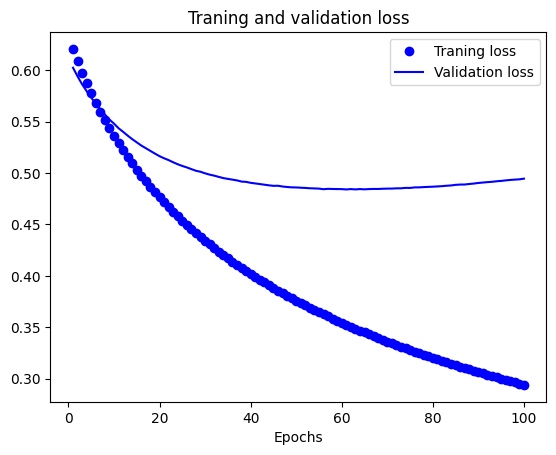

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

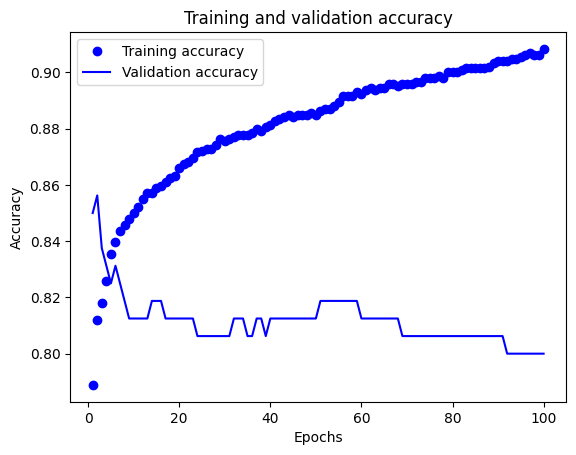

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.fit(x_train.A, y_train, epochs=3, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/3
45/45 [==============================] - 0s 8ms/step - loss: 0.2904 - accuracy: 0.9090 - val_loss: 0.4960 - val_accuracy: 0.8000
Epoch 2/3
45/45 [==============================] - 0s 6ms/step - loss: 0.2893 - accuracy: 0.9104 - val_loss: 0.4962 - val_accuracy: 0.7937
